In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')
dfH.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [4]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [5]:
dfH.describe()

,Casual,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
count,26269.000000,26280.000000,26269.000000,26269.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,159.930070,11.500000,247.165632,407.095702,62.967884,14.412782,7.228311,10.171298
std,167.330426,6.922318,225.283539,373.005409,22.724320,10.285751,17.630961,5.261033
min,0.000000,0.000000,0.000000,1.000000,5.000000,-14.600000,0.000000,0.000000
25%,28.000000,5.750000,55.000000,85.000000,46.000000,6.100000,0.000000,6.500000
50%,105.000000,11.500000,203.000000,319.000000,64.000000,14.800000,1.000000,9.200000
75%,237.000000,17.250000,371.000000,616.000000,82.000000,22.700000,2.000000,12.900000
max,1206.000000,23.000000,1534.000000,2262.000000,100.000000,41.500000,75.000000,40.100000


In [6]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [7]:
dfH.apply(lambda x: len(x.unique()))

Casual                      836
Date                       1095
Hour                         24
Member                     1160
Total_rides                1671
relativehumidity_2m (%)      96
temperature_2m (°C)         532
weathercode (wmo code)       13
windspeed_10m (km/h)        332
dtype: int64

In [8]:
dfH.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [9]:
# Calculate the total number of rides
total_rides = dfH["Total_rides"].sum()
print("Total rides:", total_rides)

Total rides: 10693997.0


In [10]:

# Calculate the number of rides by member type
member_rides = dfH.groupby("Member")["Total_rides"].sum()
print("Rides by member type:\n", member_rides)

Rides by member type:
 Member
0.0         85.0
1.0        282.0
2.0        748.0
3.0       1312.0
4.0       1763.0
           ...  
1490.0    2185.0
1495.0    2242.0
1507.0    2185.0
1528.0    2175.0
1534.0    2262.0
Name: Total_rides, Length: 1159, dtype: float64


In [11]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [12]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [13]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Extract Month and Year from the 'Date' column
dfH['Month'] = dfH['Date'].dt.month
dfH['Year'] = dfH['Date'].dt.year

dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021


In [30]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
      return 'Winter'
    elif month in [3, 4, 5]:
      return 'Spring'
    elif month in [6, 7, 8]:
      return 'Summer'
    else:
      return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year,Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021,Winter


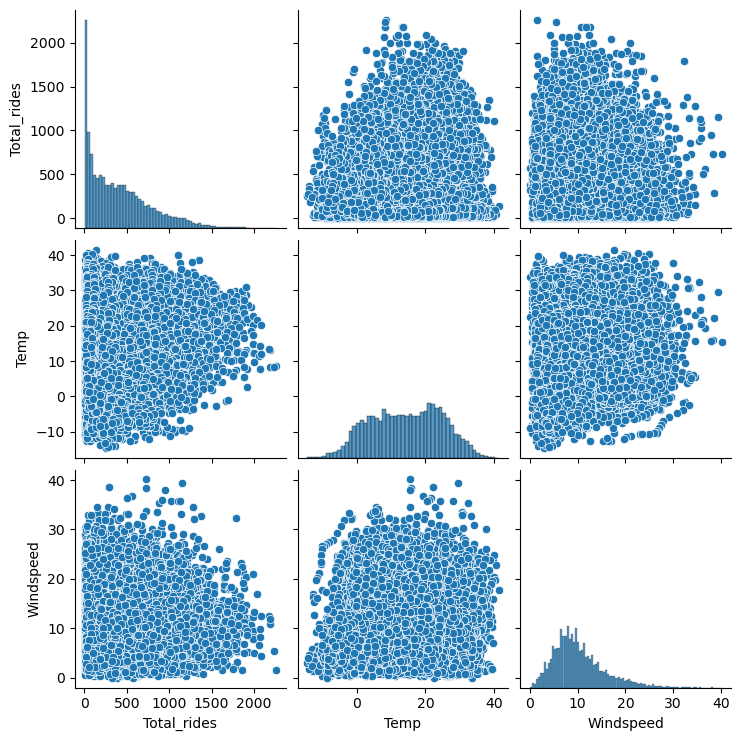

In [15]:
# Pair plot: Visualize relationships between multiple features
sns.pairplot(dfH[['Total_rides', 'Temp', 'Windspeed']])
plt.show()


[Text(0.5, 1.0, 'Count of bikes during Month')]

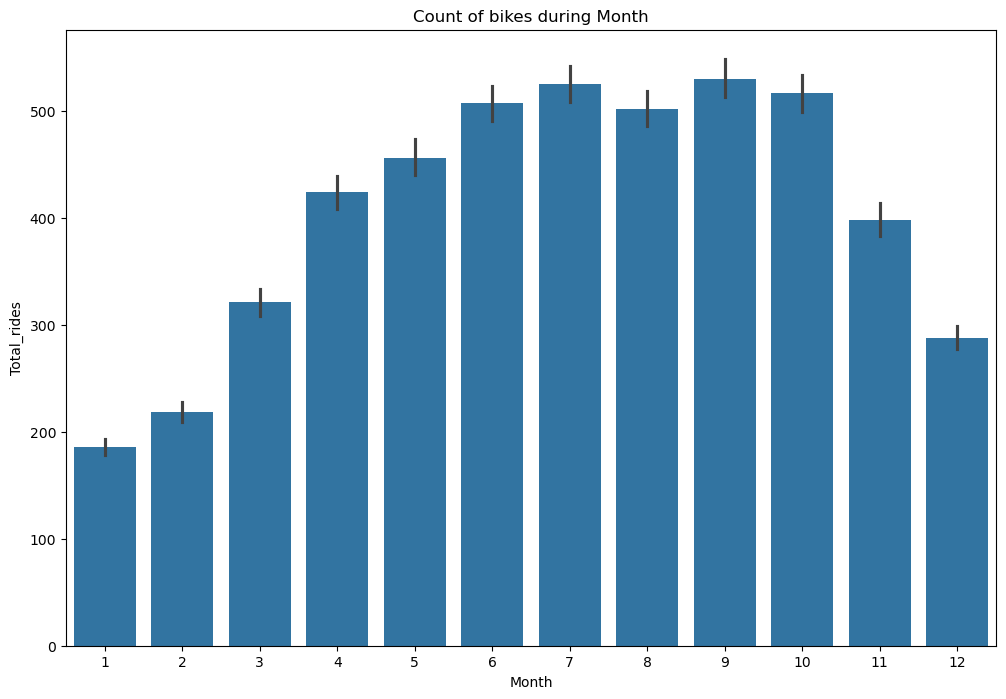

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=dfH, x='Month', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during Month')

In [17]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Season'],
      dtype='object')

In [18]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.barplot(data=dfH, x='Weekdays', y='count', ax=ax)
# ax.set(title='Count of bikes during different days')

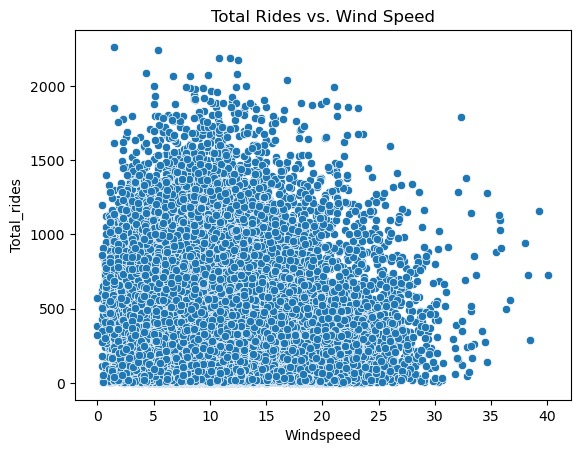

In [19]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Wind Speed')
plt.show()

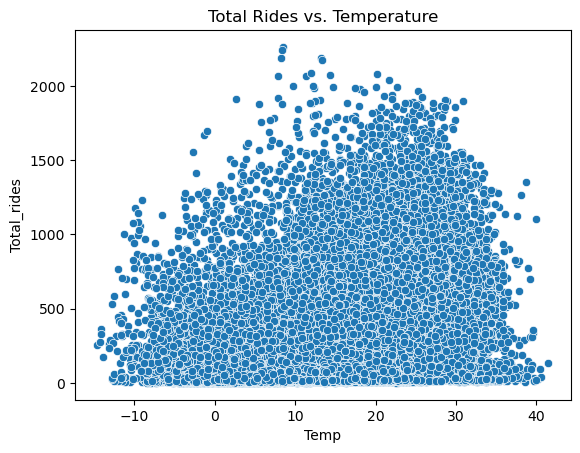

In [20]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Temperature')
plt.show()

[Text(0.5, 1.0, 'Bike Rides during Hours: Casual')]

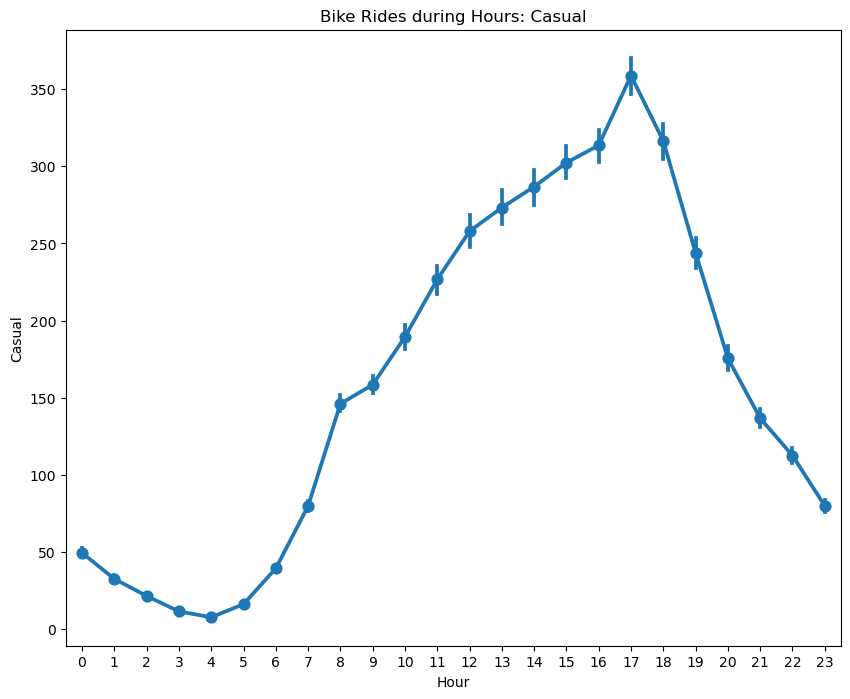

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(data=dfH, x='Hour', y='Casual', ax=ax)
ax.set(title='Bike Rides during Hours: Casual')

[Text(0.5, 1.0, ' Bike Ride during Hour: Members')]

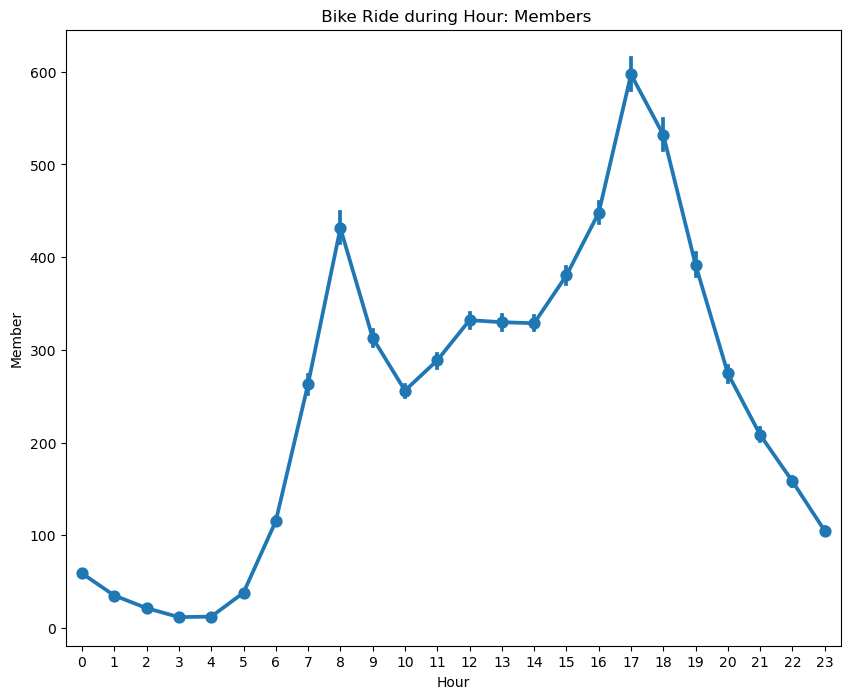

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(data=dfH, x='Hour', y='Member', ax=ax)
ax.set(title=' Bike Ride during Hour: Members')

[Text(0.5, 1.0, 'Total Rides of bikes during Hours: Registered users')]

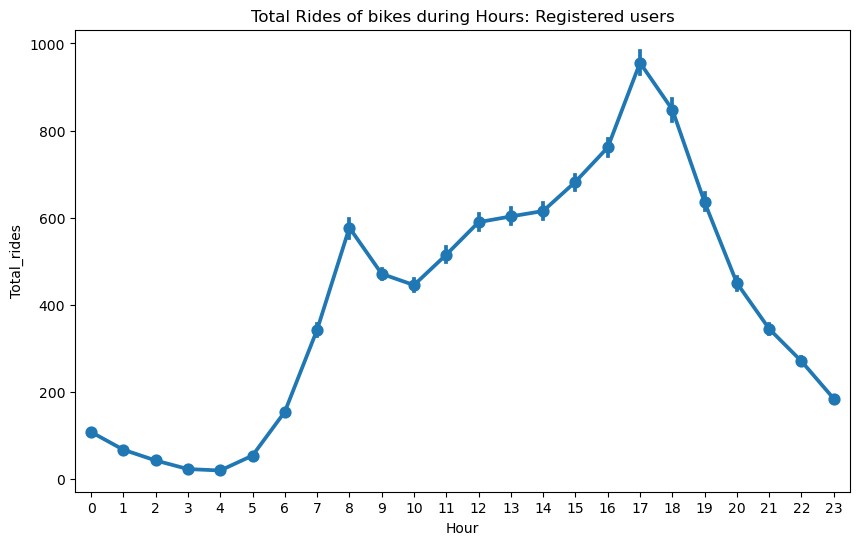

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=dfH, x='Hour', y='Total_rides', ax=ax)
ax.set(title='Total Rides of bikes during Hours: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different Season')]

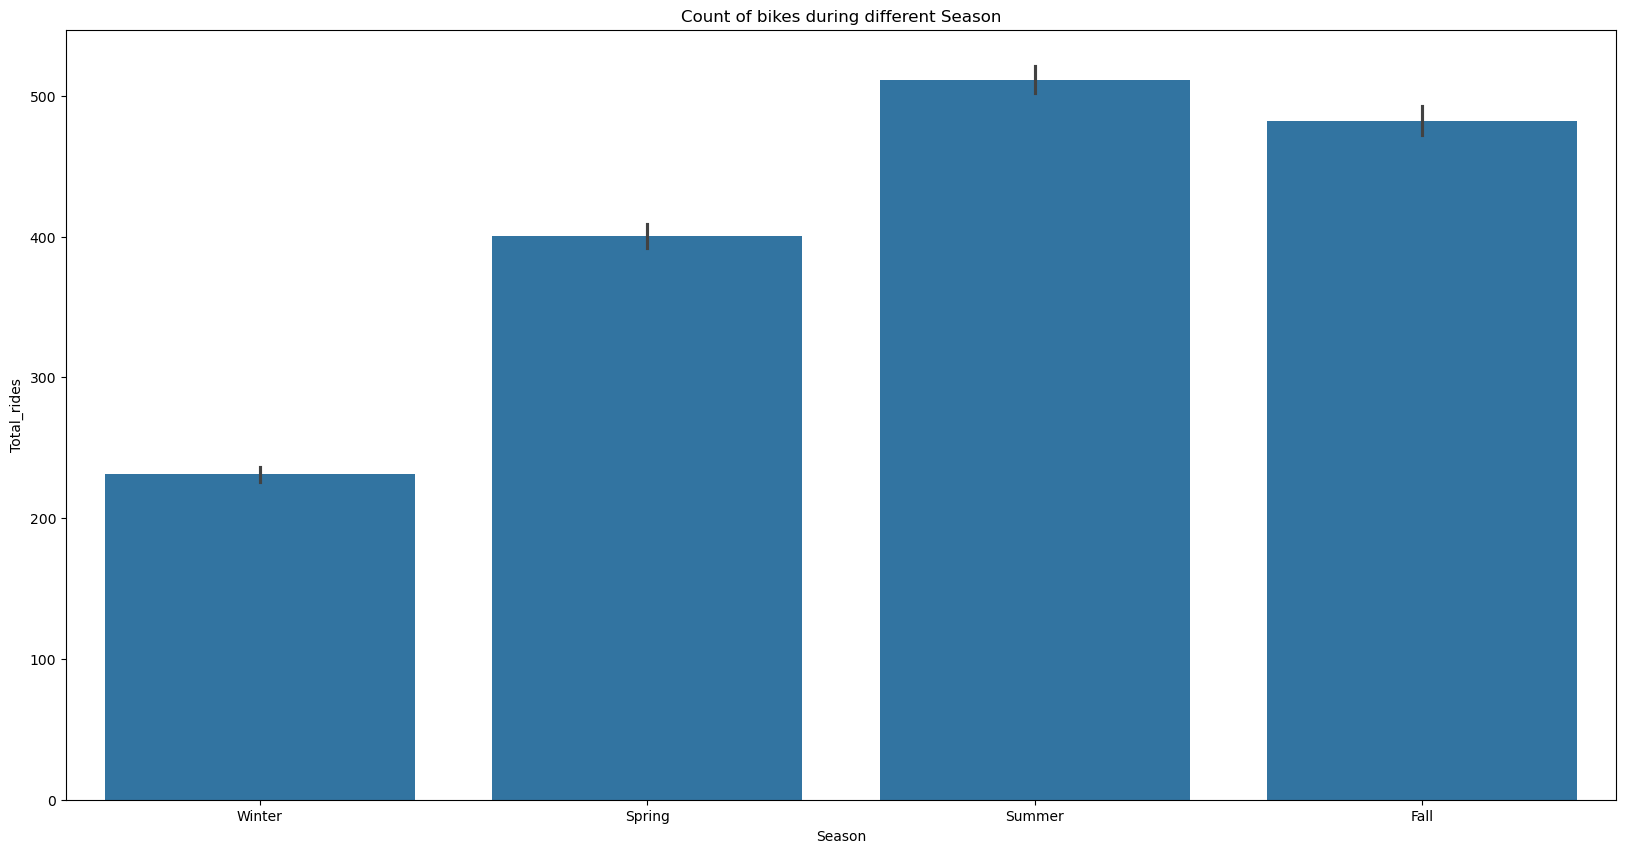

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=dfH, x='Season', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different Season')

In [25]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Season'],
      dtype='object')

In [26]:
# Filter for casual rides
casual_rides = dfH[dfH["Member"] == "Casual"]

In [27]:
# Calculate the average number of rides per hour for casual users
avg_rides_per_hour = casual_rides.groupby("Hour")["Total_rides"].mean()
print("Average rides per hour for casual users:\n", avg_rides_per_hour)

Average rides per hour for casual users:
 Series([], Name: Total_rides, dtype: float64)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
# 1. Load and preprocess data (assuming data is preprocessed and split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)